## Classification Decision Tree - Iris Flowers

### 1. Declarations Library

In [1]:
# library for manipulation array and dataset
import numpy as np
import pandas as pd

# library for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 2. Data Acquisition

In [2]:
# load dataset
dataset = pd.read_csv("../dataset/iris.csv")

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


### 3. Exploratory Data Analysis

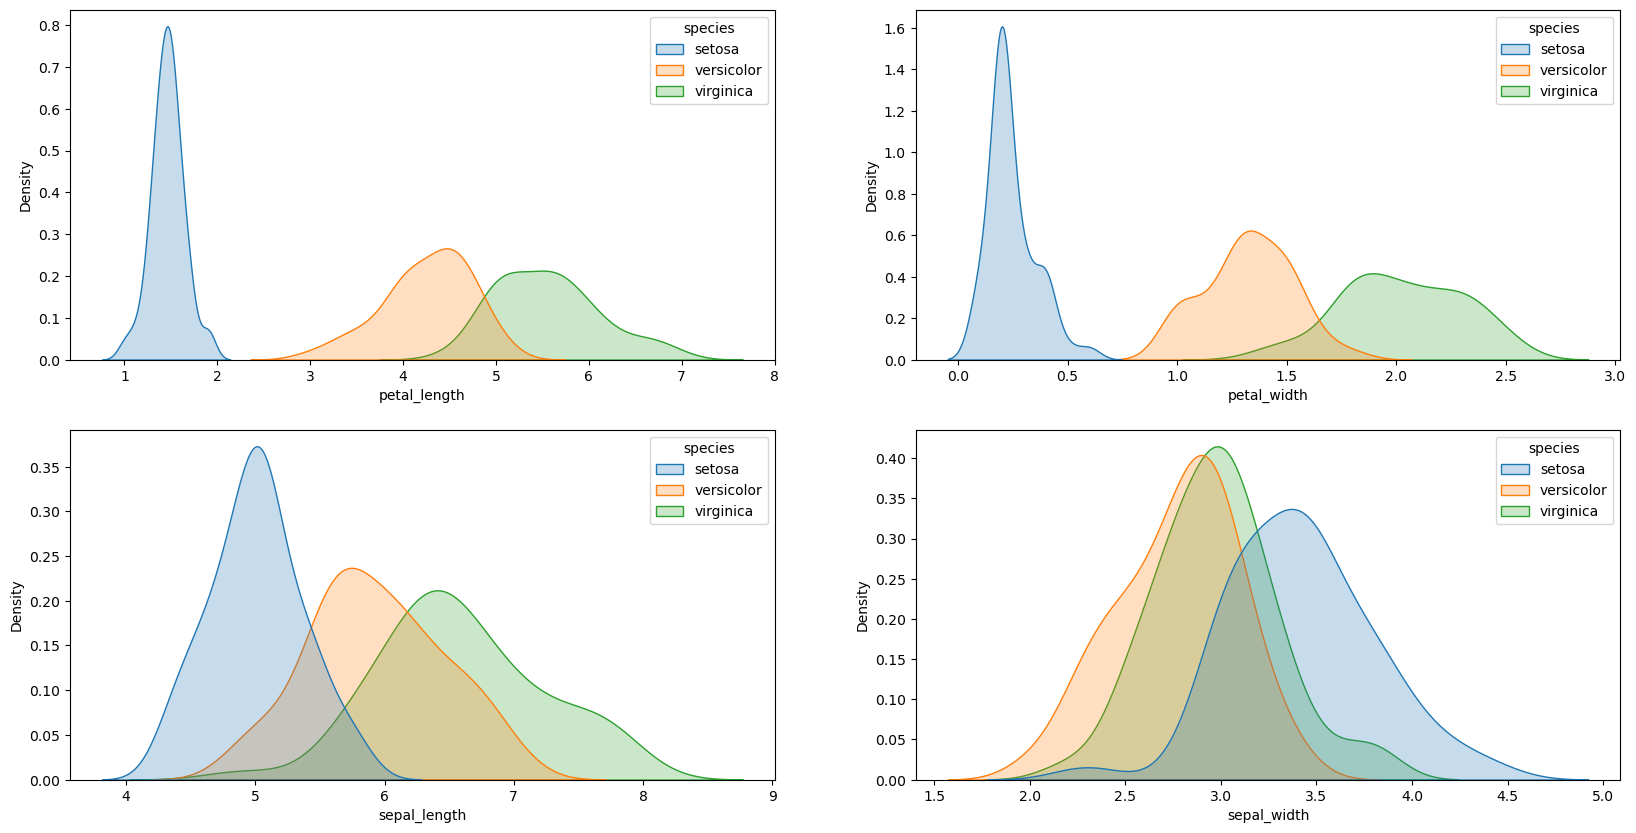

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
sns.kdeplot(dataset, x="petal_length", hue="species",  fill=True, ax=ax[0,0])
sns.kdeplot(dataset, x="petal_width", hue="species", fill=True, ax=ax[0,1])
sns.kdeplot(dataset, x="sepal_length", hue="species", fill=True, ax=ax[1,0])
sns.kdeplot(dataset, x="sepal_width", hue="species",  fill=True, ax=ax[1,1])
plt.show()

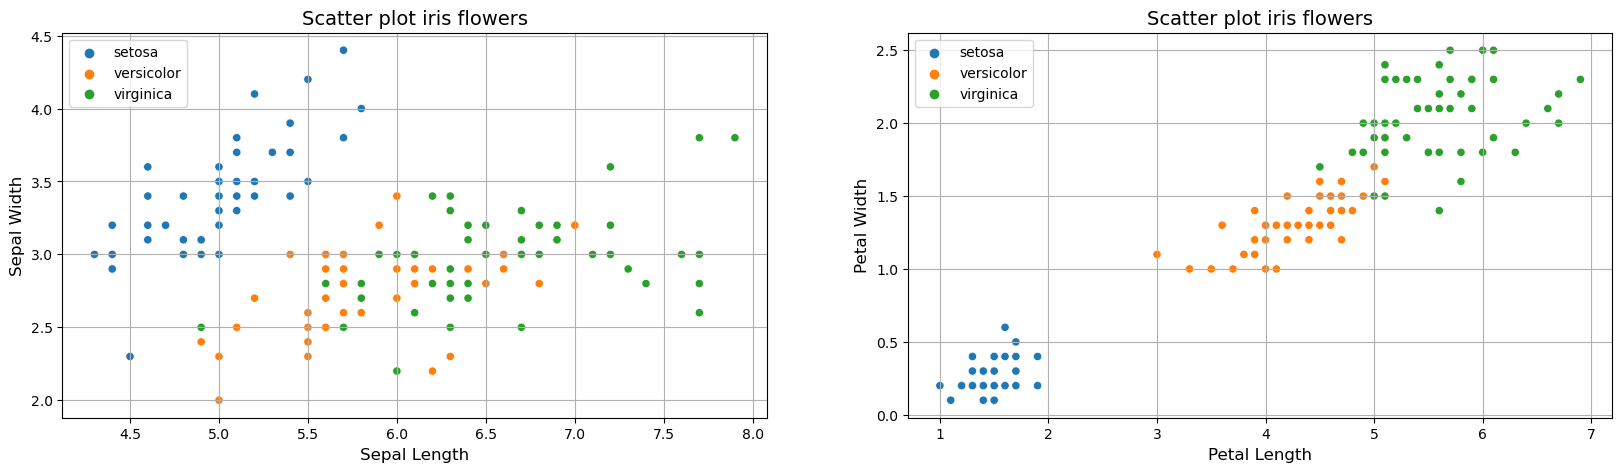

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (20,5))

sns.scatterplot(data=dataset, x='sepal_length', y='sepal_width', hue='species', ax=ax[0])
ax[0].set_title('Scatter plot iris flowers', fontsize=14)
ax[0].set_xlabel('Sepal Length', fontsize=12)
ax[0].set_ylabel('Sepal Width', fontsize=12)
ax[0].legend(loc='upper left')
ax[0].grid(True)

sns.scatterplot(data=dataset, x='petal_length', y='petal_width', hue='species', ax=ax[1])
ax[1].set_title('Scatter plot iris flowers', fontsize=14)
ax[1].set_xlabel('Petal Length', fontsize=12)
ax[1].set_ylabel('Petal Width', fontsize=12)
ax[1].legend(loc='upper left')
ax[1].grid(True)

plt.show()

### 4. Data Preprocessing

- set feature and label

In [7]:
# set independent variable and dependent variable
x = dataset[["sepal_width", "sepal_length", "petal_width", "petal_length"]]
y = dataset["species"].values.reshape(-1, 1)

In [8]:
print(x.shape, y.shape)

(150, 4) (150, 1)


- set data train and data test

In [9]:
def split_80_20 (x,y):
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234, shuffle=True)
    
    # return values
    return X_train, X_test, y_train, y_test

In [10]:
def split_70_30 (x,y):
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=1234, shuffle=True)
    
    # return values
    return X_train, X_test, y_train, y_test

### 5. Model Classification

In [11]:
# func ID3 model
def ID3(X_train,y_train):
    
    # call algorithm ID3
    clf_entropy = DecisionTreeClassifier(criterion="entropy")
    
    # train model ID3
    clf_entropy = clf_entropy.fit(X_train,y_train)
    
    # return values
    return clf_entropy

In [12]:
# func ID3 model
def C45(X_train,y_train):
    # call algorithm C45
    clf_gini = DecisionTreeClassifier(criterion="gini")
    
    # train model C45
    clf_gini = clf_gini.fit(X_train,y_train)
    
    # return values
    return clf_gini

#### Experiment 1

- Calcalation model 1

In [13]:
# set data train and data test
X_train, X_test, y_train, y_test = split_80_20(x,y)

In [14]:
# call algorithm ID3
exp_1 = ID3(X_train,y_train)

In [15]:
exp_1 = exp_1.predict(X_test)

In [16]:
print(exp_1)

['versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor' 'setosa'
 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica'
 'setosa']


- Evaluation model 1

In [17]:
accuracy_1 = accuracy_score(y_test, exp_1)
print("Accuracy of model 1: ", accuracy_1)

Accuracy of model 1:  1.0


In [18]:
report_1 = classification_report(y_test, exp_1)
print(report_1)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Experiment 2

- Calcalation model 2

In [19]:
# set data train and data test
X_train, X_test, y_train, y_test = split_70_30(x,y)

In [20]:
# call algorithm ID3
exp_2 = ID3(X_train,y_train)

In [21]:
exp_2 = exp_2.predict(X_test)

- Evaluation model 2

In [22]:
accuracy_2 = accuracy_score(y_test, exp_2)
print("Accuracy of model 2 : ", accuracy_2)

Accuracy of model 2 :  0.9555555555555556


In [23]:
report_2 = classification_report(y_test, exp_2)
print(report_2)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### Experiment 3

- Calcalation model 3

In [24]:
# set data train and data test
X_train, X_test, y_train, y_test = split_80_20(x,y)

In [25]:
# call algorithm ID3
exp_3 = C45(X_train,y_train)

In [26]:
exp_3 = exp_3.predict(X_test)

- Evaluation model 3

In [27]:
accuracy_3 = accuracy_score(y_test, exp_3)
print("Accuracy of model 3 : ", accuracy_3)

Accuracy of model 3 :  1.0


In [28]:
report_3 = classification_report(y_test, exp_3)
print(report_3)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Experiment 4

- Calcalation model 4

In [29]:
# set data train and data test
X_train, X_test, y_train, y_test = split_70_30(x,y)

In [30]:
# call algorithm ID3
exp_4 = C45(X_train,y_train)

In [31]:
exp_4 = exp_4.predict(X_test)

- Evaluation model 4

In [32]:
accuracy_4 = accuracy_score(y_test, exp_4)
print("Accuracy of model : ", accuracy_4)

Accuracy of model :  0.9777777777777777


In [33]:
report_4 = classification_report(y_test, exp_4)
print(report_4)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        17
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 6. Evaluation model

In [34]:
print("----------------------------------------------- \n")
print("Accuracy of model 1 : ", np.round(accuracy_1, 2))
print(report_1)
print("----------------------------------------------- \n")

print("Accuracy of model 2 : ", np.round(accuracy_2, 2))
print(report_2)
print("----------------------------------------------- \n")

print("Accuracy of model 3 : ", np.round(accuracy_3, 2))
print(report_3)
print("----------------------------------------------- \n")

print("Accuracy of model 4 : ", np.round(accuracy_4, 2))
print(report_4)
print("----------------------------------------------- \n")

----------------------------------------------- 

Accuracy of model 1 :  1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

----------------------------------------------- 

Accuracy of model 2 :  0.96
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        17
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

----------------------------------------------- 

Accuracy of model 3 :  1.0
      